### Assignment 1A

##### Descriptive statistics and statistical hypothesis testing




**In this assignment, we will see:**
- how to **visually inspect** experimental data
- how to characterize experimental data using **descriptive statistics**
- how to perform a simple statistic test using either a **parametric (T-test) or non-parametric (shuffling) method**


<div class="alert alert-block alert-warning">
<b>Preparing for this assignment:</b> 

The following resources will help you to get ready to complete this assignment. 
<ul>
    <li>Watch <a href="http://youtu.be/5q-Ws4y8JE4" target="_blank">this video</a> (here the <a href="https://www.cmrr.umn.edu/~kendrick/statsmatlab/StatsLecture2Slides_Hypothesis.pdf" target="_blank">slides</a>) only until time stamp 23:08 (stop right after permutation tests) in order to learn about:</li>
    <ul>
        <li>the logic of t-tests to test the hypothesis that two samples have the same mean</li>
        <li>the non-parametric equivalent in permutation tests. Make sure you understand this logic</li>
    </ul>
    <li>Read <a href="https://doi.org/10.1152/jn.00362.2015" target="_blank">this paper</a> (focussing on Experiment 2) to understand the logic of the experimental data that we will analyze</li>
</ul>
</div>

## About the dataset
We will first look at the psychophysics dataset. 

Typically, working memory is studied by asking subjects to remember a stimulus for a specific period (eg. for 1s or 3s) that was previously briefly shown. This dataset consists of two experiments conducted [in a behavioural study of working memory precision](https://doi.org/10.1152/jn.00362.2015).  Here, we are going to analyse only the data coming from Experiment 2. In this study, there was a total of 9 subjects. Each subject was shown a set of 3 colorful dots on each trial. After stimulus removal, subjects had to fixate on black square in the center of the monitor for 3 seconds. After this delay period (3 seconds), the fixation square changed color to a color of one of the previously shown stimuli. At this point, the subject had to report the precise position of that stimuli. In each trial, one stimulus was the target and the other two the non-targets. For the purpose of the article, the stimuli had a certain spatial configuration. In particular one of the two non-targets was very close to the target, either located clockwise or counter-clockwise from the target. The point of the study was to test the hypothesis that behavioral reports to target stimuli of participants would be attractively biased by non-target memory items. The purpose of this exercise is to test this hypothesis with the tools of statistical inference.

Load the data and organize it in a Pandas dataframe (as in Assignment 0).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def circdist_rad(angles1,angles2):
    output = np.angle( np.exp(1j*(angles1-angles2))) # mathematical operation to get the circular distance
    return output # return the circular distance in radians 

# load the data from github
df = pd.read_csv("https://raw.githubusercontent.com/wimmerlab/MBC-DataAnalysis/main/A0_PythonBasics/Experiment2_all_subjects.csv",sep=' ')

# list of subjects
subjects = np.unique(df.subject)

df.head()


,response,target,distr1,distr2,subject
0,2.717854,3.041933,2.727768,-1.600649,0.0
1,2.520928,3.041933,2.727768,-1.600649,0.0
2,2.683595,3.041933,2.727768,-1.600649,0.0
3,2.712245,3.041933,2.727768,-1.600649,0.0
4,2.565060,3.041933,2.727768,-1.600649,0.0


The angle on the circle of both behavioral response and stimulus locations is given in radian angles in the 4 columns of the provided data table. The column `response` corresponds to behavioral report, `target` to the target stimulus, and `distr1` and `distr2` to non-target stimuli, for each corresponding trial (in rows). In fact, the `distr1` column corresponds to the non-target stimulus closest to the target stimulus, so that is the one that we are hypothesizing that will have an influence on participants’ response. For this reason, we name clockwise trials (cw trials) those trials in which the closest non-target stimulus (or distractor) is clockwise relative to the target stimulus, and we expect this factor to have an impact on the errors of the participants.

 

Now add 3 extra columns:

1. error column (difference of response and target)
2. distance of closest distractor (difference of distractor and target)
3. cw-ccw trial

Hint: use `circdist_rad`.

In [2]:
df['error'] = circdist_rad(df['response'],df['target'])
df['dist_closest'] = circdist_rad(df['distr1'],df['target'])
df['cw'] = df['dist_closest']<0

In [3]:
df.head()

,response,target,distr1,distr2,subject,error,dist_closest,cw
0,2.717854,3.041933,2.727768,-1.600649,0.0,-0.324079,-0.314166,True
1,2.520928,3.041933,2.727768,-1.600649,0.0,-0.521005,-0.314166,True
2,2.683595,3.041933,2.727768,-1.600649,0.0,-0.358338,-0.314166,True
3,2.712245,3.041933,2.727768,-1.600649,0.0,-0.329688,-0.314166,True
4,2.565060,3.041933,2.727768,-1.600649,0.0,-0.476873,-0.314166,True


## 1. Visualization
Plot the visual input in one specific trial by plotting the three cues and the behavioral response in different colors. Be sure to include a legend with `plt.legend`. As a reference, include the fixation dot (at coordinates `(0,0)`) as a black cross. To be specific, let’s take trial 4 of the 3rd subject. Remember that given an angle α in radians, the x and y coordinates on the circle are given by cos(α) and sin(α), respectively, and these trigonometric functions are part of the **numpy** package.

Hint: here we will need to subset the rows of a Pandas dataframe, and this can be tricky. By default, the Pandas dataframe keeps the row indices of the original full dataframe, so the new subset dataframe will lack a series of row indices. In order to force a re-numbering of rows in the subset, we need to invoke `reset_index()`. Still, Pandas will consider that we still want to keep the connection with the parent dataset so it will add by default a new column (called 'index') with the row indices in the parent dataset. If we do not want this column added, then we will invoke `reset_index(drop=True)`. Another possibility is to use `iloc`.


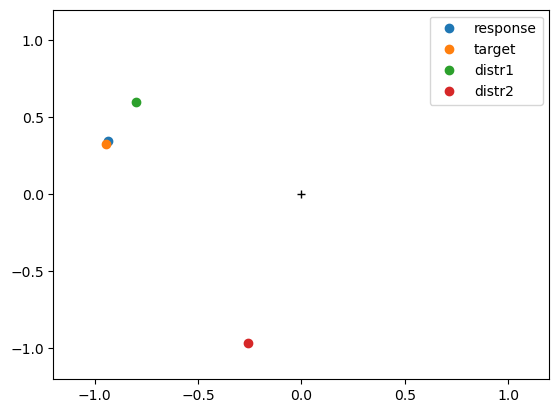

In [4]:
### Visualize a trial
### subject 3, trial 4
bool_s3 = df['subject'] == 2 # create a boolean for trials corresponding to the 3rd subject
ds = df[bool_s3].reset_index(drop=True) # subset from the dataframe df the trials for the 3rd subject. Don't forget to 'reset_index()'!
ex_trial = 3 # specific trial number that we want to plot for the 3rd subject

plt.plot(0, 0, 'k+') # first plot the fixation cross 
for lct in ds.columns[:4]: # now we cycle through all the columns of interest of our dataset (the 4 first)
    plt.plot(np.cos(ds[lct][ex_trial]), np.sin(ds[lct][ex_trial]), 'o', label=lct) # for each column, we plot a circle at the corresponding location of the stimulus
plt.legend(loc=1) # place the legend
plt.xlim(-1.2, 1.2) # set limits for the x-axis
plt.ylim(-1.2, 1.2); # set limits for the y-axis

### alernative: access the 4th trial of subject 3 with iloc:
#df[bool_s3].iloc[ex_trial].response



In [5]:
assert ex_trial%3==0
assert ds.shape[0]==93

## 2. Characterizing data: descriptive statistics

We will deal with descriptive statistics in more detail when we analyze spiking data. Here we will go quickly over this, but generally plotting the data and characterizing it with a few summarizing statistics that give a good succint description of the data is the first thing that one should do. Understanding what the data is like is fundamental to design meaningful analyses.

Using measures of centrality and/or dispersion, design a method to confirm that the second column is the target stimulus, and the 3rd and 4th columns are non-target stimuli. By definition the target stimulus is the stimulus to which participants are responding to so their responses should be closer to. There are several possible solutions to this. Find yours! Write your code in the next cell, then use the "Insert" option in the upper menu and select "Insert Cell Below" to add one more cell in this notebook in order to enter you interpretation of the results. Make sure you mark this cell as "Markdown" in the menu above before you "shift+ENTER" it.

In [6]:
for clm in df.columns[1:4]: 
    print(np.var(circdist_rad(df['response'],df[clm])))

0.022610614795975762
0.09429849566642695
5.680122969020586


An even better approach is to use visualization tools. Use the knowledge you have about the stimulus configuration and the *plt.hist* function to confirm that 1st column is the target. 


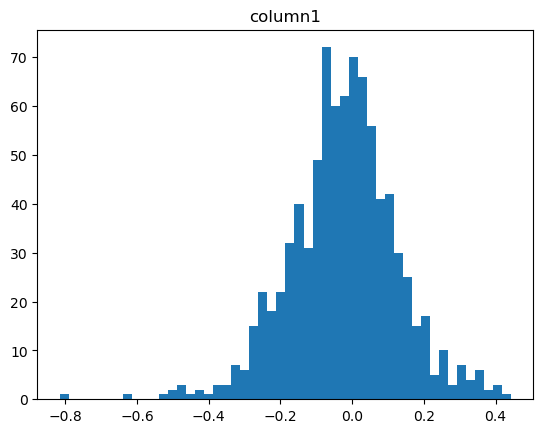

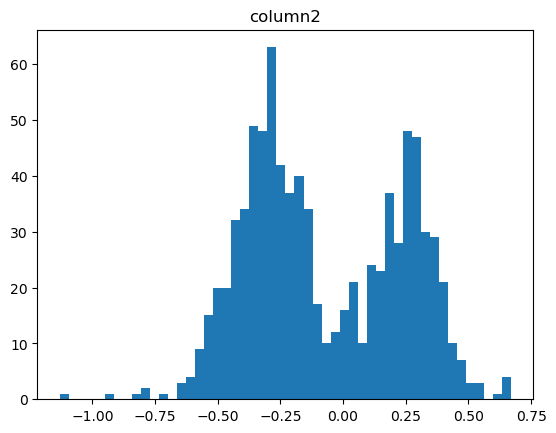

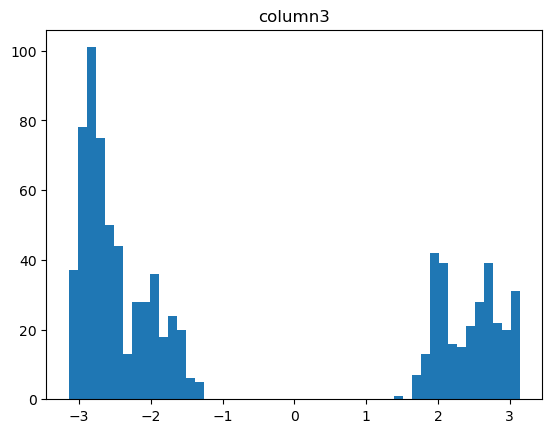

Column 1 is the target


In [7]:
hist1=circdist_rad(df['response'],df['target'])
plt.figure()
plt.title('column1')
plt.hist(hist1, bins=50)
plt.show()

hist2=circdist_rad(df['response'],df['distr1'])
plt.figure()
plt.title('column2')
plt.hist(hist2, bins=50)
plt.show()

hist3=circdist_rad(df['response'],df['distr2'])
plt.figure()
plt.title('column3')
plt.hist(hist3, bins=50)
plt.show()

print('Column 1 is the target')

## 3. Statistical hypothesis testing: parametric methods

### 3.1 Parametric methods

We want to test if there is any effect at the population level of the nearest non-target (NT) item (column *'distr1'*) on the bias of the behavioral response. The simplest way to test this is by using a t-test to compare the behavioral errors (response (R) - target (T)) for trials in which the NT was clockwise to the T stimulus (CW trials, NT-T<0) with the behavioral errors for trials in which the NT was counterclockwise to the T stimulus (CCW trials, NT-T>0), lumping together data from all subjects. 

Before we run the statistical test, let's plot this data. Let's plot in different histograms trials when the nearest non-target item (*'distr1'*) was clockwise or counter-clockwise from the target (*'target'*). Remember that we already built a column (*'cw'*) identifying (True/False) these two conditions.

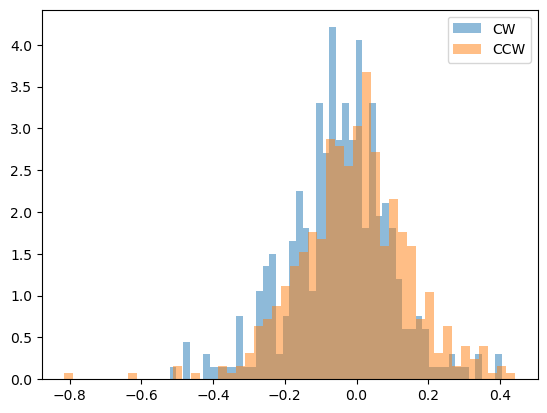

In [8]:
plt.figure()
bool_cw = df['cw'] == True # get a boolean for CW trials
plt.hist(df[bool_cw].error, alpha=0.5, bins=50, label='CW', density=True) # plot histogram of CW trials
bool_ccw = df['cw'] == False # get a boolean for CCW trials
plt.hist(df[bool_ccw].error, alpha=0.5, bins=50, label='CCW', density=True) # plot histogram of CCW trials
plt.legend(); # draw legend

In [9]:
assert np.sum(bool_cw)==359
assert np.sum(bool_ccw)==498

In the histogram plots above, we used the arguments `alpha=0.5` and `density=True`. Play with those arguments to see what they do. You can vary `alpha` between 0 and 1, and you can switch on and off `density`. You can also read about them [here](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

Now, plot the CW/CCW histograms for each subject. Remember this is as easy as embedding the code of the two histograms above within a for loop, and subsetting the dataframe to consider only the trials for one given subject (remember `reset_index()` when subsetting rows of a dataframe!).

As a new thing, instead of plotting one new figure for each subject with `plt.figure()`, we will now plot each subject histograms on separate subplots of one single figure. This is accomplished with the `plt.subplot` command. Google it to figure out how to use it. Here we will be using an array of 3x3 subplots.

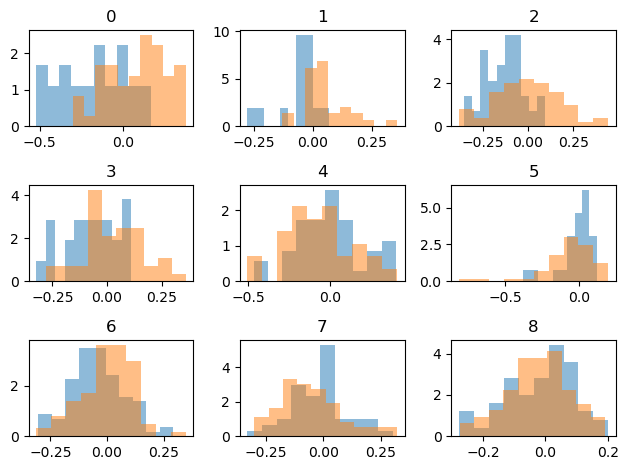

In [10]:
plt.figure() # we generate a new figure outside the for loop, so not a new figure for each subject
for subject in range(9): # we cycle through the 9 subjects. We know that they are numbered 0 through 8 in column 'subject'
    plt.subplot(3,3,subject+1) # we now select the subplot where we want to plot the histograms for *subject*
    bool_s = df['subject']==subject # we construct a boolean to select rows correspondint to participant *subject*
    ds=df[bool_s].reset_index() #we subset the full dataframe df to select trials of participant *subject*
    bool_cw = ds['cw'] == True # we construct a boolean to select rows of the subset dataframe ds corresponding to CW trials
    plt.hist(ds[bool_cw].error, alpha=0.5, density=True) # we plot the histogram of 'error' in CW trials for subject *subject*
    bool_ccw = ds['cw'] == False # we construct a boolean to select rows of the subset dataframe ds corresponding to CCW trials
    plt.hist(ds[bool_ccw].error, alpha=0.5, density=True) # we plot the histogram of 'error' in CCW trials for subject *subject*
    plt.title(str(subject)) # we add a title to mark the subject that this subplot corresponds to
#
plt.tight_layout() # this makes the graph nicer. Try without it (putting a # in front)

Here is a more consice version of the same code:

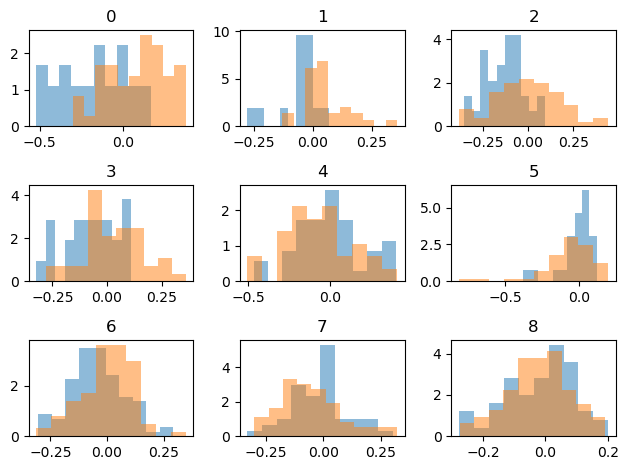

In [11]:
plt.figure()
for subject in range(9):
    plt.subplot(3,3,subject+1)
    plt.hist(df[(df.subject == subject) & (df.cw == True)].error, alpha=0.5, density=True)
    plt.hist(df[(df.subject == subject) & (df.cw == False)].error, alpha=0.5, density=True)
    plt.title(str(subject)) 
plt.tight_layout()

Test if there is a difference between cw and ccw at both population and subject level. We will use the t-test as implemented in the scipy library (you can Google *ttest_ind*)

Is there an attractive or repulsive effect? How do you know?

In [12]:
from scipy.stats import ttest_ind

## First for all trials together, merging data from all participants
#
bool_cw = df['cw'] == True # boolean for CW trials 
bool_ccw = df['cw'] == False # boolean for CCW trials
t, p_val = ttest_ind(df[bool_ccw].error, df[bool_cw].error) # apply the test to errors from CW and CCW trials
if p_val < 0.05:
    if t > 0:
        print('Population has a sign. attractive effect (p = %f)' %p_val)
    if t < 0:
        print('Population has a sign. repulsive effect (p = %f)' %p_val)



Population has a sign. attractive effect (p = 0.000131)


Now we run the same test to trials for each subject separately:

In [13]:
## Now we run the same test to trials for each subject separately
#
for subject in range(9): #loop through subjects
    bool_s = df['subject'] == subject # boolean for rows corresponding to subject *subject*
    ds = df[bool_s].reset_index() # subset dataframe for subject *subject* (remember 'reset_index()' ! )
    bool_cw = ds['cw']==True # boolean for rows of ds corresponding to CW trials
    bool_ccw = ds['cw']==False # boolean for rows of ds corresponding to CCW trials
    t, p_val =ttest_ind(ds[bool_ccw].error, ds[bool_cw].error) # t-test comparing mean error in CW and CCW trials for subject *subjec*
    if p_val < 0.05:
        if t > 0:
            print('Subject', subject, 'has a sign. attractive effect')
        if t < 0:
            print('Subject ', subject, 'has a sign. repulsive effect')


Subject 0 has a sign. attractive effect
Subject 1 has a sign. attractive effect
Subject 2 has a sign. attractive effect
Subject 3 has a sign. attractive effect
Subject 6 has a sign. attractive effect


In [14]:
assert np.sum(bool_s) == 120
assert np.sum(bool_ccw)-np.sum(bool_cw) == 16

### 3.2 Non-parametric methods (shuffling)

We can instead avoid the Gaussian hypothesis by using permutation tests. Here, for each subject one would randomly shuffle the CW/CCW label of each trial by keeping the total number in each class fixed. This resampled distribution of trials in two classes then represents one valid representative sample consistent with your null hypothesis (which is your null hypothesis, by the way?). You compute the distance between medians in your resampled classes, and save that statistic. Then you resample again and repeat the process 1,000 times. Finally you compare the actual statistic from your real CW-CCW class separation to the distribution of statistics in samples that are consistent with your null hypothesis and from there derive a p-value for the probability of your null hypothesis being true. Check the video provided in the supporting material above for a step-by-step explanation of this *resampling* or *permutation test*.


First, write in the next cell, using a "Markdown" cell, your null hypothesis in **boldface**

**H0: simultaneous memories do not have an impact on the accuracy of the queried memory. Therefore, response errors in trials with CW/CCW non-target memories come from the same underlying error distribution.**

Now use the permutation test for the 5th subject.
Do you get similar results with the ttest?

In [15]:
#first we select the data for the 5th subject (which has label 4) in the new dataset ds
bool_s = df['subject'] == 4
ds = df[bool_s].reset_index()

#we form booleans for CW and CCW trials
bool_cw = ds['cw'] == True
bool_ccw = ds['cw'] == False

#first let's compute the t-test with the true selection of trials and save this for later
t, p_val = ttest_ind(ds[bool_ccw].error, ds[bool_cw].error)

#Now we start the permutation test
#we define our statistic of interest as the difference in medians of the two lists of errors, for CW and CCW trials.
statistic = np.median( ds[bool_ccw].error ) - np.median( ds[bool_cw].error ); 

#we now generate the resampled data for the permutation test
n_perm = 1000 # number of permutations desired
stat_perm = []  # notice this trick in Python. We generate an empty list like this, and then we will append successively with *append* in the for loop, after the loop we make a numpy array of this list
for _ in range(n_perm): #we now run our permutations. Since we will not need to know the number of the permutation in the loop, we use this _ symbol
    np.random.shuffle(bool_cw.values) #shuffle randomly the True/False entries in the array perm_cw
    bool_ccw = np.invert(bool_cw) #invert the reshuffled booleans to get the list of random CCW trials 
    stat_perm.append(np.median( ds[bool_ccw].error )- np.median( ds[bool_cw].error  ) ) #compute the statistic from our permuted classes, and save it in the list stat_perm

stat_perm = np.array(stat_perm) # now turn the Python list into a Numpy array for mathematical calculations

#here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the 
#shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
#least as extreme as our true data if our null hypothesis was true.
p_value = np.mean( abs(stat_perm)> abs(statistic)); 
print('Subject 5, p_value permutat_test: ' +str(p_value))

#plot the t-test result for comparison
print('Subject 5, p_value t-test: ' +str(p_val))


Subject 5, p_value permutat_test: 0.269
Subject 5, p_value t-test: 0.2364952986204767


Now to understand the result of the permutation test, plot a histogram of your resampled statistics in *stat_perm* and mark the statistic that you obtain in your true data on the x-axis. 

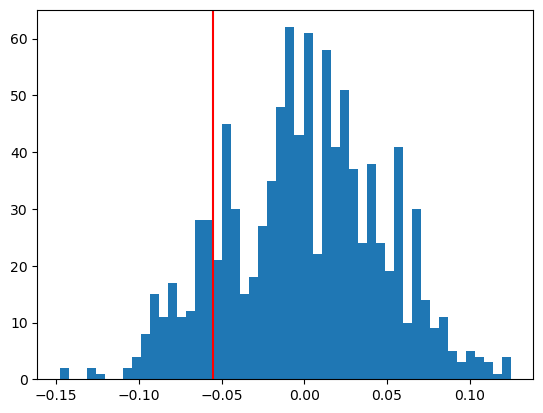

In [16]:
plt.hist(stat_perm, bins=50) # histogram of the resampled statistic
plt.axvline(x=statistic, color='red'); # red vertical line marking the true statistic

Now interpret what the p-value means. Write your answer as a Markdown cell below (Insert it with "Insert"> "Insert Cell Below" in the top menu) 

**p-value is the proportion of resampled statistics that are at least as extreme as the observed statistic. Because resampled statistics are obtained under the assumption ot H0, the p-value is the probability that one would get the result obtained if the null hypothesis H0 was true.**

To test if your interpretation is correct, now run again the permutation test for the first subject and see if it all makes sense.

Now do this together for all subjects in a for loop: compute permutation test, t-test, and plot histograms for all subjects iterating what we did before for one single subject

Subject 0 p_value permutat_test: 0.0, p_value t-test: 1.3655649256224282e-07
Subject 1 p_value permutat_test: 0.045, p_value t-test: 0.00022828766643899205
Subject 2 p_value permutat_test: 0.001, p_value t-test: 0.0004783972654604955
Subject 3 p_value permutat_test: 0.009, p_value t-test: 0.005427342231541307
Subject 4 p_value permutat_test: 0.266, p_value t-test: 0.2364952986204767
Subject 5 p_value permutat_test: 0.186, p_value t-test: 0.12427312231154074
Subject 6 p_value permutat_test: 0.003, p_value t-test: 0.038831890527641584
Subject 7 p_value permutat_test: 0.021, p_value t-test: 0.18815597714173096
Subject 8 p_value permutat_test: 0.351, p_value t-test: 0.8307482777724265


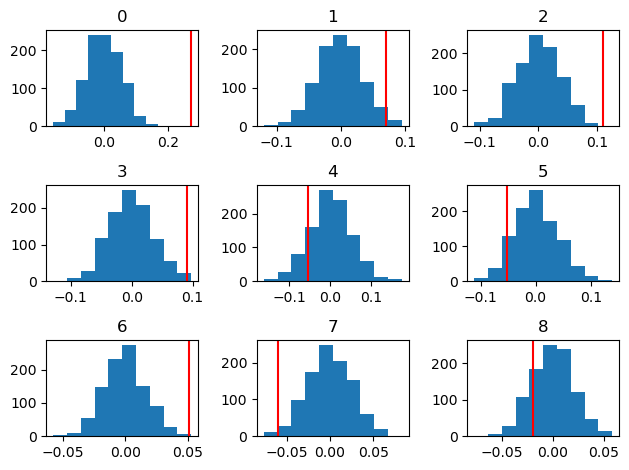

In [17]:
plt.figure()
for subj in range(9):
    #first we select the data for subject subj
    bool_s = df['subject']==subj
    ds = df[bool_s].reset_index()
    
    #we form booleans for CW and CCW trials
    bool_cw = ds['cw'] == True
    bool_ccw = ds['cw'] == False

    #we define our statistic of interest as the difference in medians of the two lists of errors, for CW and CCW trials.
    statistic = np.median( ds[bool_ccw].error ) - np.median( ds[bool_cw].error ); 

    #t-test
    t, p_val_t = ttest_ind(ds[bool_ccw].error, ds[bool_cw].error)

    #we now generate the resampled data for the permutation test. See comments in previous analogous code
    n_perm = 1000
    stat_perm=[]
    for _ in range(n_perm): 
        np.random.shuffle(bool_cw.values)
        bool_ccw = np.invert(bool_cw); 
        stat_perm.append(np.mean( ds[bool_ccw].error ) - np.mean( ds[bool_cw].error  ) )

    stat_perm = np.array(stat_perm)
    #print(np.median(stat_perm))

    #here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the 
    #shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
    #least as extreme as our true data if our null hypothesis was true.
    p_val_perm = np.mean( abs(stat_perm)> abs(statistic)); 
    
    print('Subject ' +str(subj ) +' p_value permutat_test: ' +str(p_val_perm) +', p_value t-test: ' +str(p_val_t))
    
    plt.subplot(3,3,subj+1)
    plt.hist(stat_perm)
    plt.axvline(x=statistic, color='red')
    plt.title(str(subj))

#    
plt.tight_layout()
